# MINIPROJECT 2022-23: KYPHOSIS DISEASE DETECTION ON CHILDREN WHO HAD CORRECTIVE SPINAL SURGERY

**MADE BY: DEVANSH GOEL, STUDENT ID: 20011990**

# TASK 1: UNDERSTAND THE PROBLEM STATEMENT

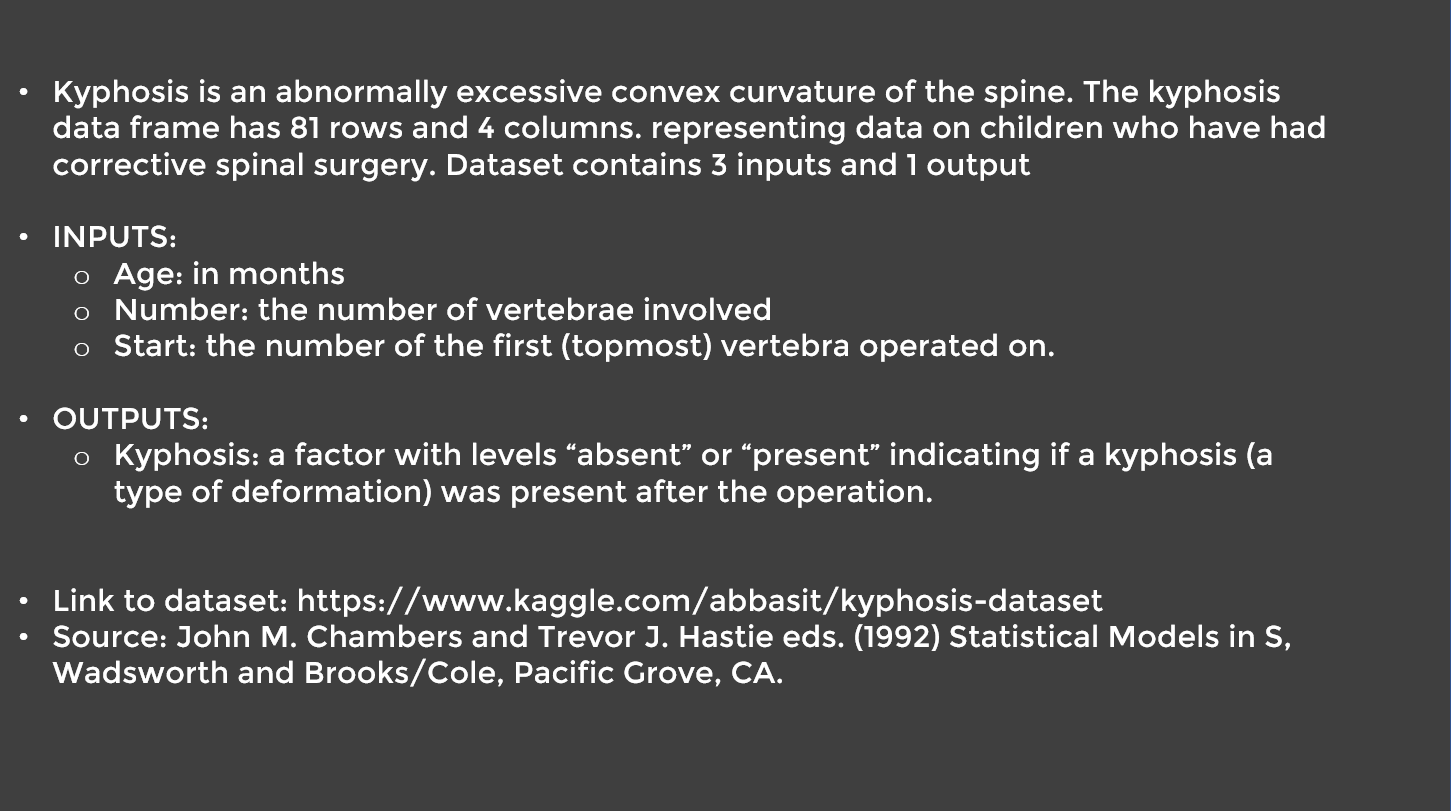

# TASK #2: IMPORT LIBRARIES AND DATASETS


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
#setting the style of the notebook to be monokai theme  
#this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [2]:
kyphosis_df = pd.read_csv("kyphosis.csv")

In [3]:
kyphosis_df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [4]:
kyphosis_df.tail(7)

,Kyphosis,Age,Number,Start
74,absent,11,3,15
75,absent,178,4,15
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [5]:
kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


# TASK #3: PERFORM DATA VISUALIZATION

In [7]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_y = LabelEncoder()
kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(kyphosis_df['Kyphosis'])

In [8]:
kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [9]:
Kyphosis_True = kyphosis_df[kyphosis_df['Kyphosis']==1]

In [10]:
Kyphosis_False = kyphosis_df[kyphosis_df['Kyphosis']==0]

In [11]:
print( 'Disease present after operation percentage =', (len(Kyphosis_True) / len(kyphosis_df) )*100,"%")

Disease present after operation percentage = 20.98765432098765 %


<AxesSubplot:>

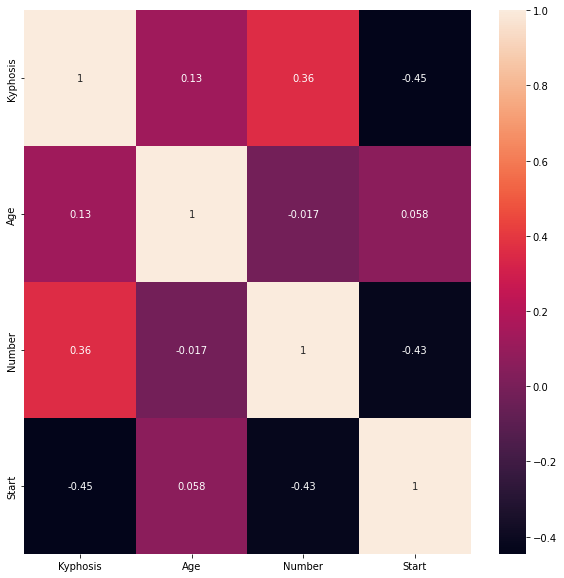

In [12]:
plt.figure(figsize=(10,10)) 
sns.heatmap(kyphosis_df.corr(),annot=True)

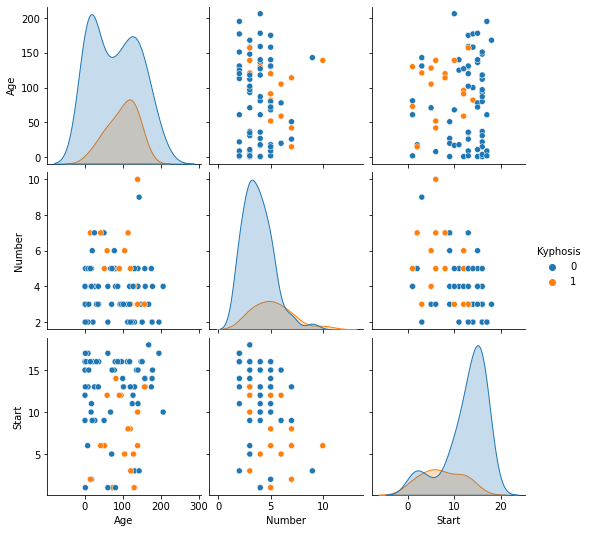

In [13]:
sns.pairplot(kyphosis_df, hue='Kyphosis')

<AxesSubplot:xlabel='Kyphosis', ylabel='count'>

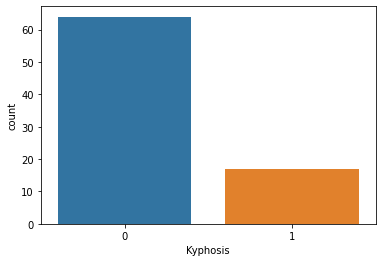

In [14]:
sns.countplot(x=kyphosis_df["Kyphosis"])

# TASK #4: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [15]:
# Let's drop the target label coloumns
x=kyphosis_df.drop(["Kyphosis"],axis=1)
y=kyphosis_df["Kyphosis"]

In [16]:
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [17]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int32

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=42)

In [20]:
x_train.shape

(40, 3)

In [21]:
x_test.shape


(41, 3)

In [22]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)


# TASK #5: TRAIN A LOGISTIC REGRESSION CLASSIFIER MODEL

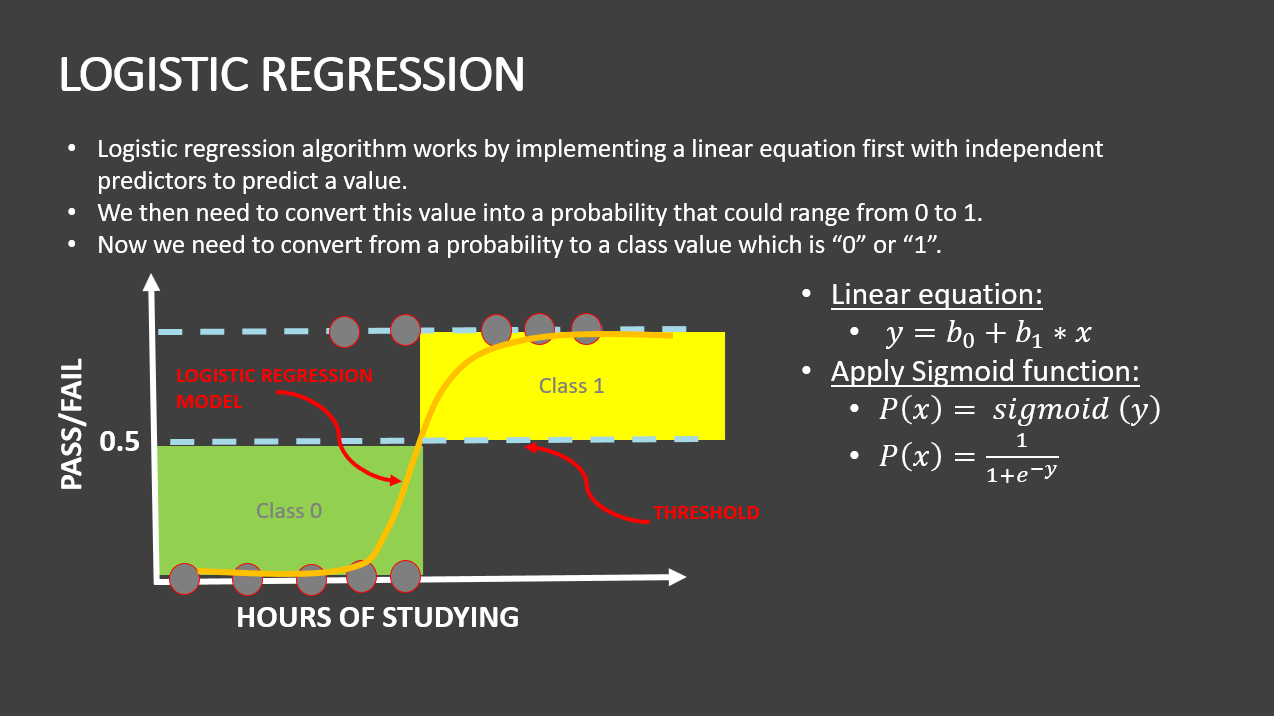

In [23]:
x_train.shape

(40, 3)

In [24]:
y_train.shape

(40,)

In [25]:
x_test.shape

(41, 3)

In [26]:
y_test.shape

(41,)

In [27]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

# TASK #6: EVALUATE TRAINED MODEL PERFORMANCE 

In [28]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
model_accuracy={}

<AxesSubplot:>

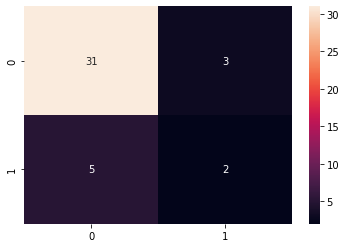

In [29]:
# Predicting the Test set results
y_predict_test=model.predict(x_test)
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)

In [30]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        34
           1       0.40      0.29      0.33         7

    accuracy                           0.80        41
   macro avg       0.63      0.60      0.61        41
weighted avg       0.78      0.80      0.79        41



In [31]:
model_accuracy["Logistic_Regression"]=accuracy_score(y_test,y_predict_test)

# TASK #7: UNDERSTAND THE THEORY AND INTUITION BEHIND DECISION TREES AND RANDOM FOREST CLASSIFIER MODELS

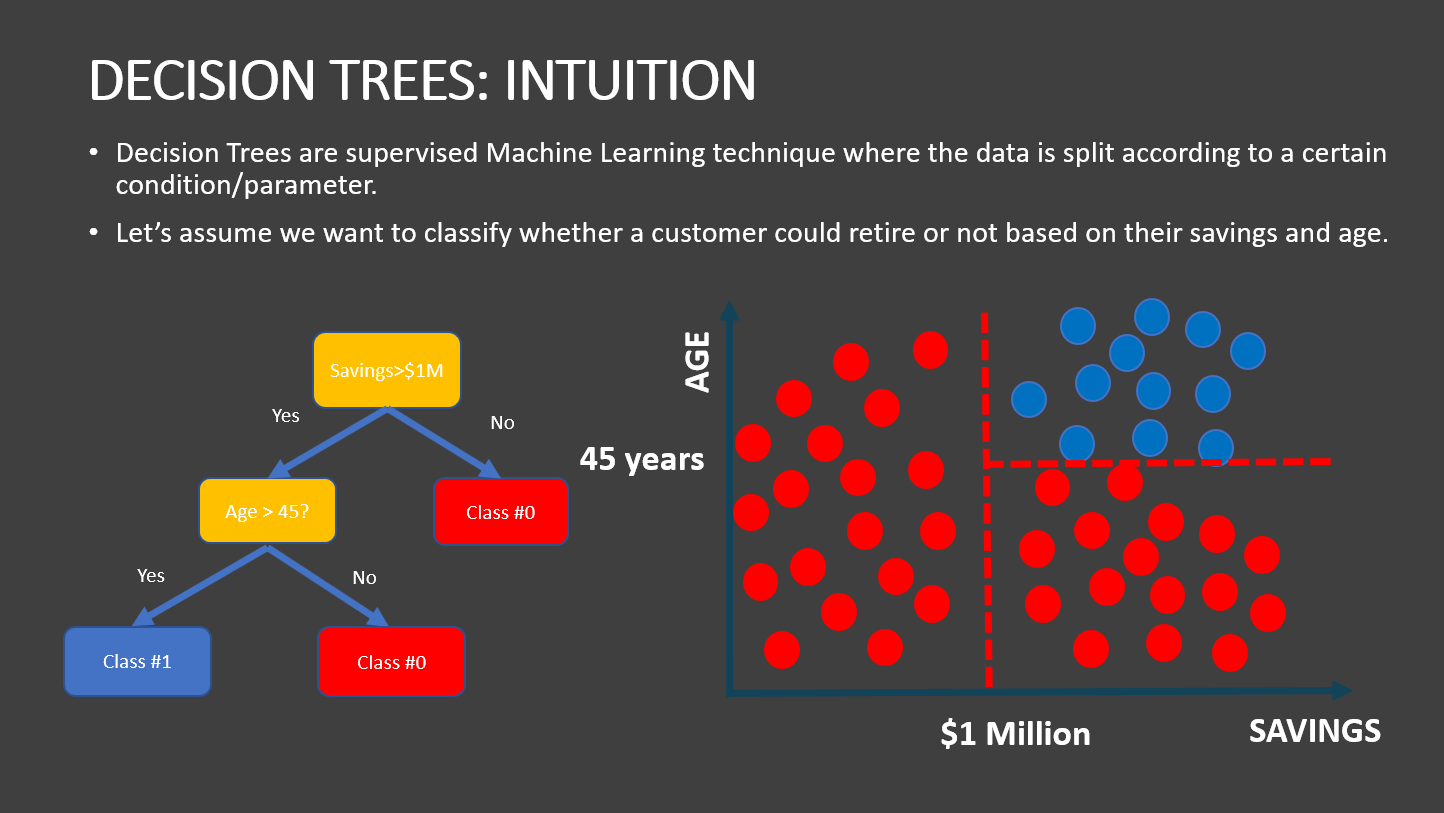

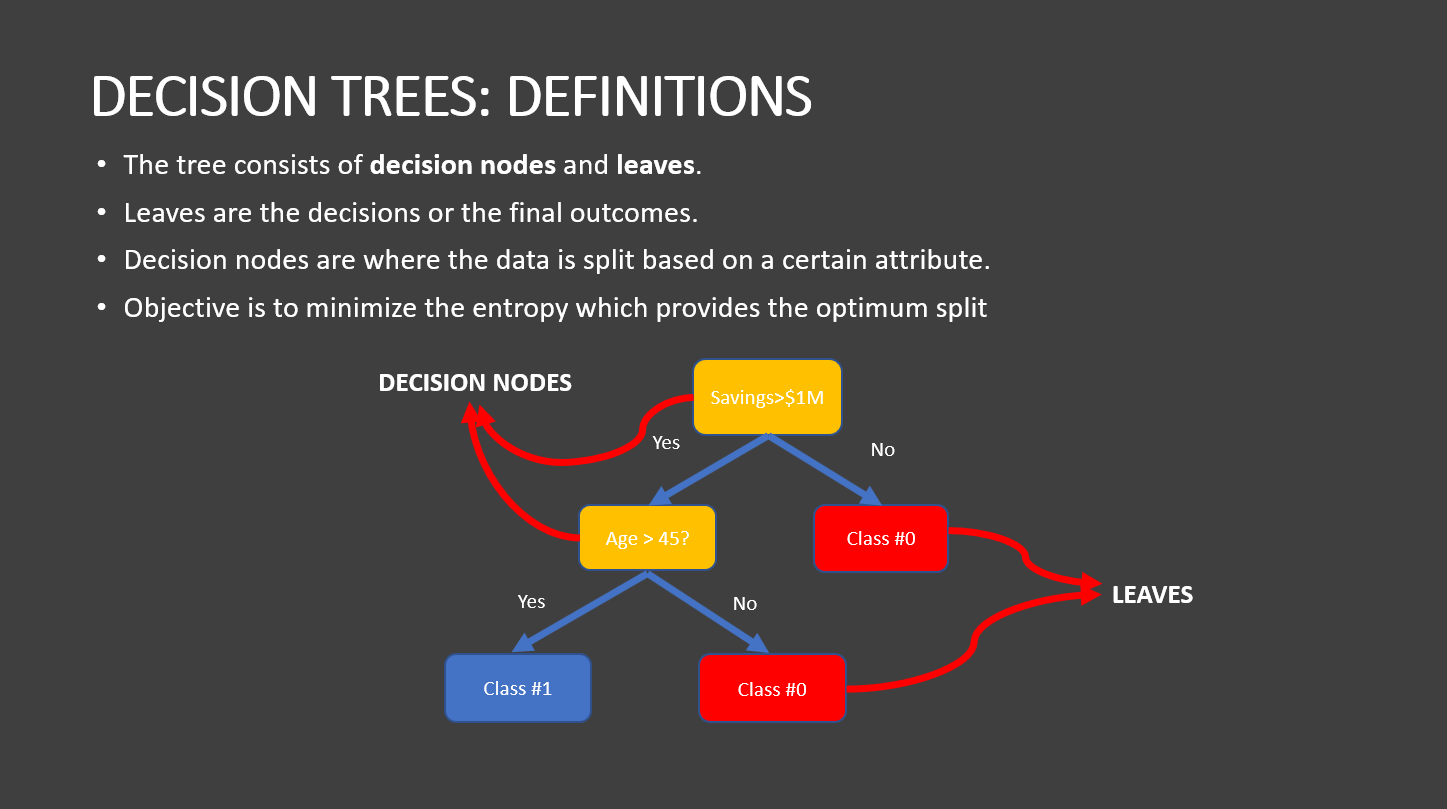

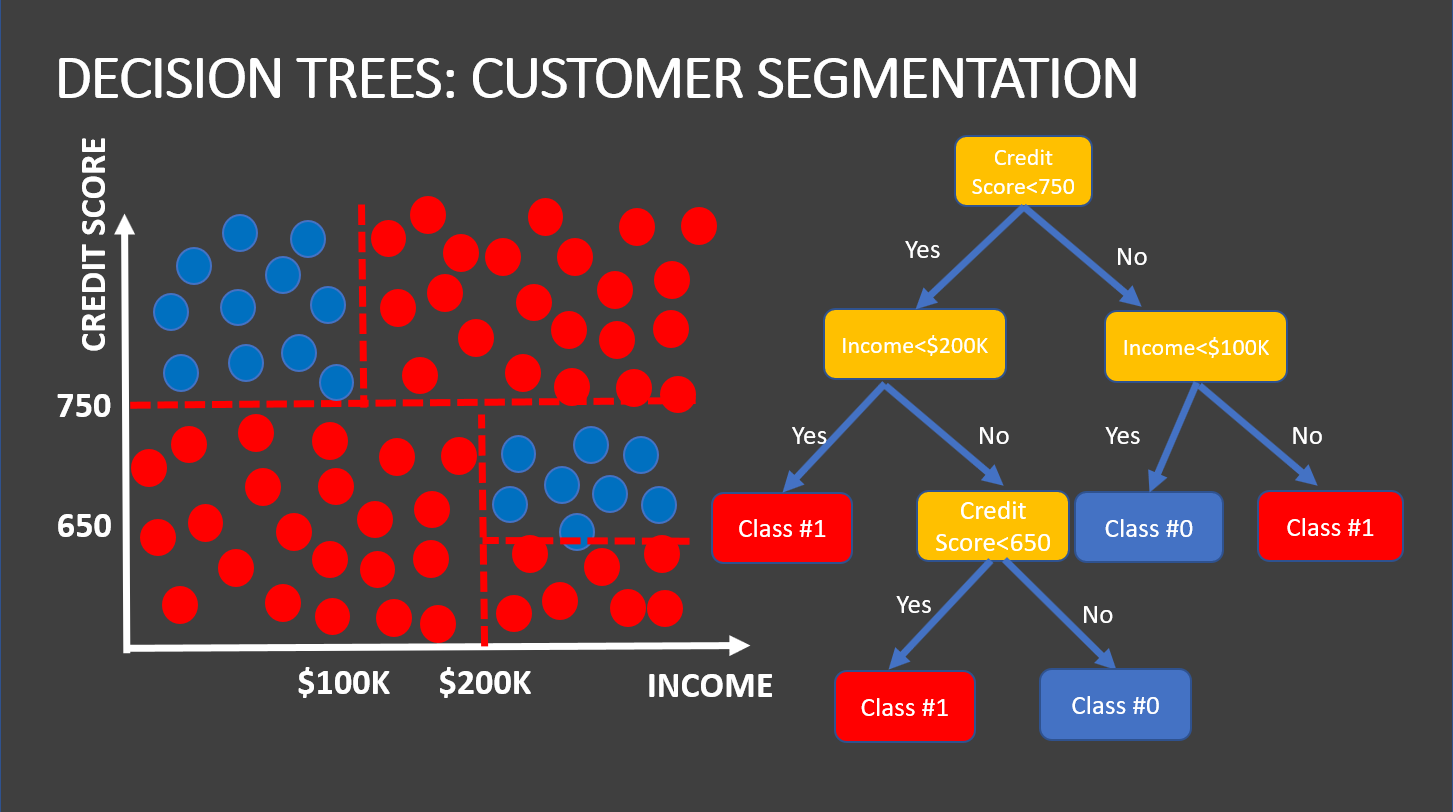

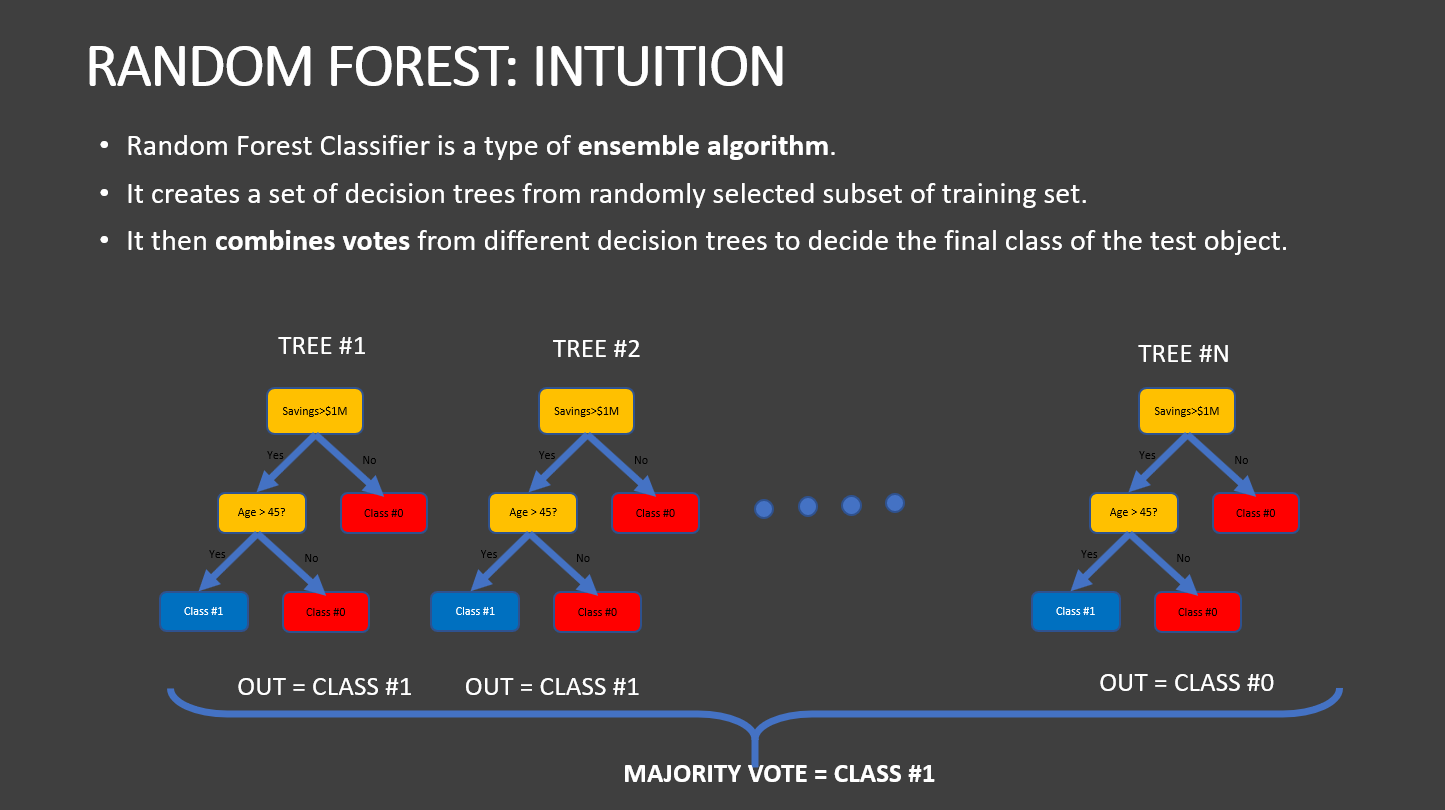

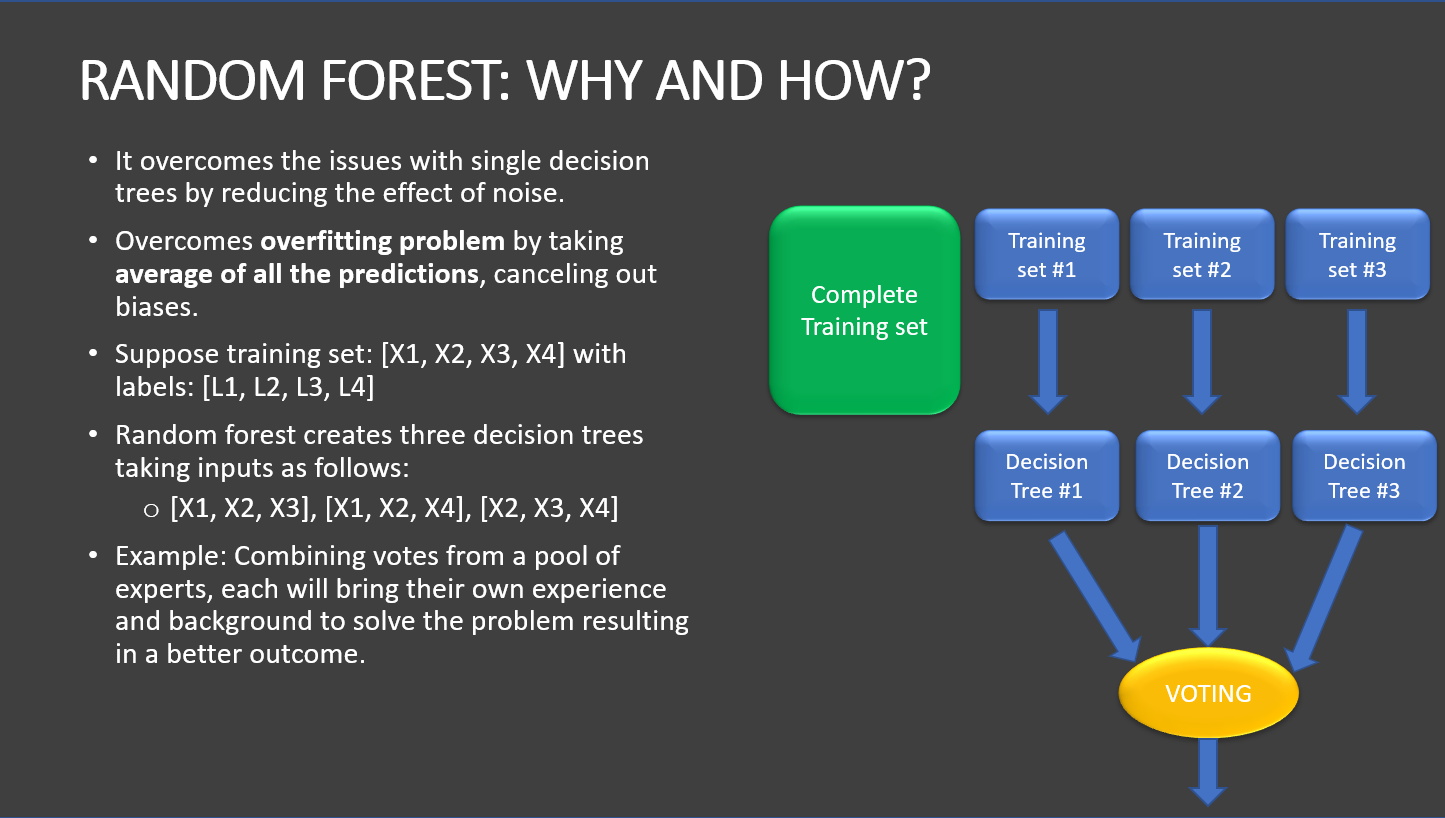

# TASK #8: RECREATE AND EVALUATE THE MODEL USING DECISION TREE 

In [32]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

<AxesSubplot:>

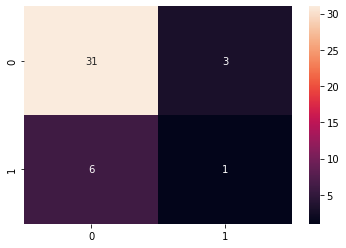

In [33]:
# Predicting the Test set results
y_predict_test = decision_tree.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [34]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        34
           1       0.25      0.14      0.18         7

    accuracy                           0.78        41
   macro avg       0.54      0.53      0.53        41
weighted avg       0.74      0.78      0.76        41



In [35]:
model_accuracy["Decision_Tree"]=accuracy_score(y_test,y_predict_test)

In [36]:
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances)

        importance
Start     0.555708
Age       0.346111
Number    0.098182


# TASK #9 RECREATE AND EVALUATE MODEL USING RANDOM FOREST
- **Train a random forest classifier model and assess its performance**
- **Plot the confusion matrix**
- **Print the classification Report**


In [37]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)


RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.85      0.97      0.90        34
           1       0.50      0.14      0.22         7

    accuracy                           0.83        41
   macro avg       0.67      0.56      0.56        41
weighted avg       0.79      0.83      0.79        41



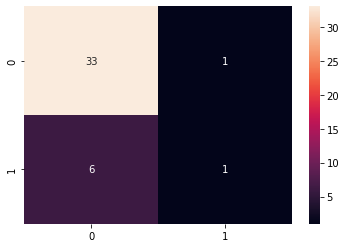

In [38]:
y_predict_test=random_forest.predict(x_test)
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_predict_test))
model_accuracy["Random_Forest"]=accuracy_score(y_test,y_predict_test)

# TASK #10 RECREATE AND EVALUATE MODEL USING KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
testingScores=[]
trainingScores=[]
K=[]
scores={}

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
  
    training_score = knn.score(x_train, y_train)
    test_score = knn.score(x_test, y_test)
    K.append(k)
  
    trainingScores.append(training_score)
    testingScores.append(test_score)
    scores[k] = [training_score, test_score]


In [41]:
for keys, values in scores.items():
    print(keys, ':', values)

1 : [1.0, 0.8048780487804879]
2 : [0.8, 0.8292682926829268]
3 : [0.85, 0.8292682926829268]
4 : [0.775, 0.8292682926829268]
5 : [0.8, 0.8536585365853658]
6 : [0.8, 0.8292682926829268]
7 : [0.8, 0.8292682926829268]
8 : [0.75, 0.8292682926829268]
9 : [0.775, 0.8292682926829268]
10 : [0.75, 0.8292682926829268]
11 : [0.75, 0.8292682926829268]
12 : [0.75, 0.8292682926829268]
13 : [0.75, 0.8292682926829268]
14 : [0.75, 0.8292682926829268]
15 : [0.75, 0.8292682926829268]
16 : [0.75, 0.8292682926829268]
17 : [0.75, 0.8292682926829268]
18 : [0.75, 0.8292682926829268]
19 : [0.75, 0.8292682926829268]
20 : [0.75, 0.8292682926829268]
21 : [0.75, 0.8292682926829268]
22 : [0.75, 0.8292682926829268]
23 : [0.75, 0.8292682926829268]
24 : [0.75, 0.8292682926829268]
25 : [0.75, 0.8292682926829268]
26 : [0.75, 0.8292682926829268]
27 : [0.75, 0.8292682926829268]
28 : [0.75, 0.8292682926829268]
29 : [0.75, 0.8292682926829268]
30 : [0.75, 0.8292682926829268]
31 : [0.75, 0.8292682926829268]
32 : [0.75, 0.829268

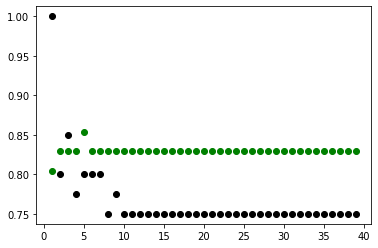

In [42]:
plt.scatter(K, trainingScores, color ='k')
plt.scatter(K, testingScores, color ='g')
plt.show()

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        34
           1       1.00      0.14      0.25         7

    accuracy                           0.85        41
   macro avg       0.93      0.57      0.58        41
weighted avg       0.88      0.85      0.80        41



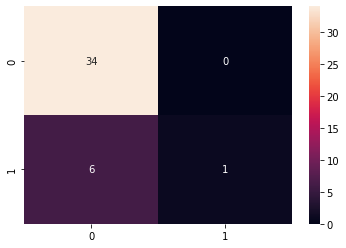

In [43]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)
y_predict_test=knn.predict(x_test)
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_predict_test))


In [44]:
model_accuracy["KNN"]=accuracy_score(y_test,y_predict_test)

# TASK #11 RECREATE AND EVALUATE MODEL USING NAIVE BAYES

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        34
           1       0.40      0.29      0.33         7

    accuracy                           0.80        41
   macro avg       0.63      0.60      0.61        41
weighted avg       0.78      0.80      0.79        41



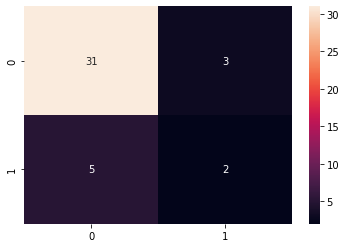

In [45]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_predict_test=gnb.predict(x_test)
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_predict_test))
model_accuracy["Gaussian_Naive_Bayes"]=accuracy_score(y_test,y_predict_test)

# TASK #12 RECREATE AND EVALUATE MODEL USING SVM

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        34
           1       0.33      0.29      0.31         7

    accuracy                           0.78        41
   macro avg       0.60      0.58      0.59        41
weighted avg       0.77      0.78      0.77        41



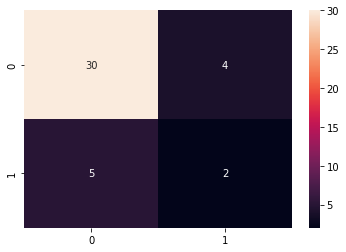

In [46]:
from sklearn.svm import SVC
SVM=SVC(kernel="linear")
SVM.fit(x_train,y_train)
y_predict_test=SVM.predict(x_test)
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_predict_test))
model_accuracy["SVM"]=accuracy_score(y_test,y_predict_test)

In [47]:
for keys, values in model_accuracy.items():
    print(keys, ':', values)

Logistic_Regression : 0.8048780487804879
Decision_Tree : 0.7804878048780488
Random_Forest : 0.8292682926829268
KNN : 0.8536585365853658
Gaussian_Naive_Bayes : 0.8048780487804879
SVM : 0.7804878048780488


# TASK #13 RECREATE AND EVALUATE MODEL USING NEURAL NETWORK

In [48]:
import keras

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [50]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test) 
nn=Sequential()
nn.add(Dense(3,activation="relu",input_shape=(3,)))
nn.add(Dense(5,activation="relu"))
nn.add(Dense(2,activation="softmax"))
nn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])


In [51]:
nn.fit(x_train,y_train,validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
2/2 [==============================] - 1s 232ms/step - loss: 5.4959 - accuracy: 0.7500 - val_loss: 3.4414 - val_accuracy: 0.7805
Epoch 2/50
2/2 [==============================] - 0s 30ms/step - loss: 5.3623 - accuracy: 0.7250 - val_loss: 3.3544 - val_accuracy: 0.7805
Epoch 3/50
2/2 [==============================] - 0s 30ms/step - loss: 5.2299 - accuracy: 0.7250 - val_loss: 3.2731 - val_accuracy: 0.7805
Epoch 4/50
2/2 [==============================] - 0s 29ms/step - loss: 5.0937 - accuracy: 0.7250 - val_loss: 3.1942 - val_accuracy: 0.7561
Epoch 5/50
2/2 [==============================] - 0s 29ms/step - loss: 4.9563 - accuracy: 0.7250 - val_loss: 3.1143 - val_accuracy: 0.7561
Epoch 6/50
2/2 [==============================] - 0s 27ms/step - loss: 4.8484 - accuracy: 0.7250 - val_loss: 3.0354 - val_accuracy: 0.7561
Epoch 7/50
2/2 [==============================] - 0s 28ms/step - loss: 4.7260 - accuracy: 0.7250 - val_loss: 2.9615 - val_accuracy: 0.7561
Epoch 8/50
2/2 [==========

In [52]:
y_predict_test=nn.predict(x_test)
score=nn.evaluate(x_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.6829


In [53]:
print(score[1])
model_accuracy["Neural_Network"]=score[1]

0.6829268336296082


# Result

In [54]:
for keys, values in model_accuracy.items():
    print(keys, ':', values)

Logistic_Regression : 0.8048780487804879
Decision_Tree : 0.7804878048780488
Random_Forest : 0.8292682926829268
KNN : 0.8536585365853658
Gaussian_Naive_Bayes : 0.8048780487804879
SVM : 0.7804878048780488
Neural_Network : 0.6829268336296082


**THIS MODEL WILL BE USED TO CREATE WEBSITE THAT CAN PREDICT WHETHER PERSON HAVE KYPHOSIS OR NOT**